In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.datasets import fetch_openml 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mnist=fetch_openml(name='mnist_784')

In [2]:
mnist.data.shape

(70000, 784)

In [3]:
def showimage(dframe,index):
    some_digit=dframe.to_numpy()[index]
    some_digit_image=some_digit.reshape(28,28)
    
    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show

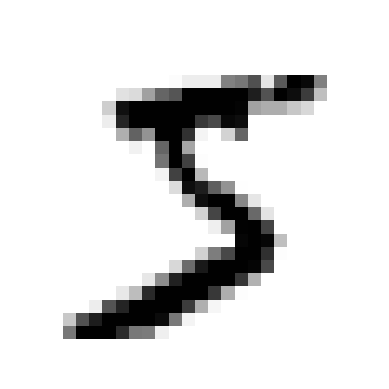

In [5]:
showimage(mnist.data,0)

In [6]:
train_img,test_img,train_lbl,test_lbl=train_test_split(mnist.data,mnist.target,test_size=1/7.0,random_state=0)

In [7]:
test_img_copy=test_img.copy()

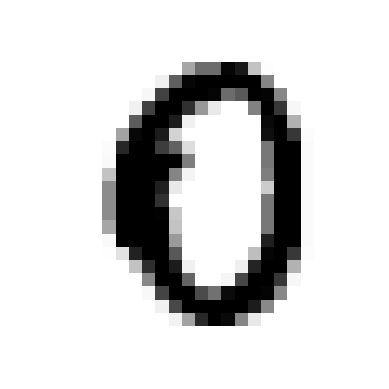

In [8]:
showimage(test_img_copy,0)

In [9]:
scaler=StandardScaler()

scaler.fit(train_img)

train_img=scaler.transform(train_img)
test_img=scaler.transform(test_img)

In [10]:
pca=PCA(.95) # variance

In [11]:
pca.fit(train_img) # Fit the PCA model to our training images

PCA(n_components=0.95)

In [12]:
print(pca.n_components_) # %95 variance explained and feature size 784->327

327


In [13]:
train_img=pca.transform(train_img)
test_img=pca.transform(test_img)

In [14]:
logisticRegr=LogisticRegression(solver='lbfgs',max_iter=10000)

In [15]:
logisticRegr.fit(train_img,train_lbl)

LogisticRegression(max_iter=10000)

In [16]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

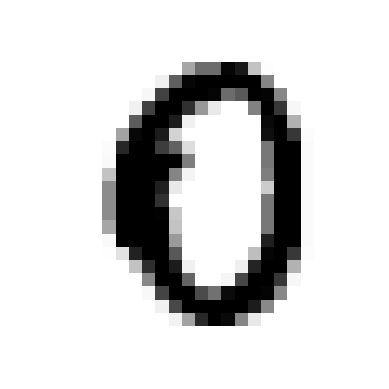

In [17]:
showimage(test_img_copy,0)

In [18]:
logisticRegr.predict(test_img[2].reshape(1,-1))

array(['1'], dtype=object)

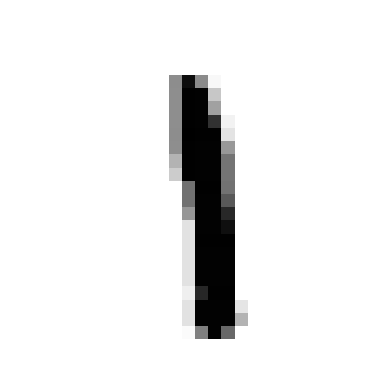

In [19]:
showimage(test_img_copy,2)

In [20]:
logisticRegr.score(test_img,test_lbl)

0.9185